## PROJ25: Machine Learning Project of Student Dropout Success dataset

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

from sklearn.metrics import * 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV

# Changes 1
1. [Change path](#path-change) Change path to be relative and not dependent on machine
2. [Changes in BNB fit](#change-bnb-fit) Change numbering from 14 to 15

branch Ludwig

In [2]:
import warnings
warnings.filterwarnings("ignore", message='Glyph 9?')

### 1. DATA EXPLORATION (EDA)
<a id="path-change"></a>

In [3]:
# df = pd.read_csv('/Users/nima/Downloads/PROJ25/gruppuppgift/02_dataset/student_dropout_success/data.csv', sep=';')
df = pd.read_csv('./data.csv', sep=';') # Change path to be relative and not dependent on machine

In [4]:
df.info

<bound method DataFrame.info of       Marital status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance\t  Previous qualification  \
0                                1                       1   
1              

In [5]:
print(df.keys())

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [7]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [8]:
df.shape

(4424, 37)

In [9]:
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [10]:
pd.isnull(df).sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [11]:
# Checking unique values in the Target attribute and the distribution of the unique values
target_types = Counter(df['Target'])
print(df['Target'].unique())
print(target_types)

['Dropout' 'Graduate' 'Enrolled']
Counter({'Graduate': 2209, 'Dropout': 1421, 'Enrolled': 794})


In [12]:
# Creating dataframe without enrolled
df2 = df.copy(deep=True)
df2 = df2[df2.Target != 'Enrolled']
target_types2 = Counter(df2['Target'])
print(df2['Target'].unique())
print(target_types2)

['Dropout' 'Graduate']
Counter({'Graduate': 2209, 'Dropout': 1421})


In [13]:
# Transforming Target to numerical values, Dropout=0, Enrolled=1, Graduate=2
dft2 = df2.copy(deep=True)
le = LabelEncoder()
label = le.fit_transform(dft2['Target'])
dft2.drop("Target", axis=1, inplace=True)
dft2["Target"] = label

In [14]:
# Creating X, dataset without labels
X2 = dft2.drop(['Target'], axis=1)

In [15]:
# Creating y, the label dataset
y2 = dft2['Target']

In [18]:
# Splitting the data into a training and a test dataset
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, stratify=y2)

In [21]:
# Scaling the data with StandardScaler
scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train.astype(np.float64))
X2_test_scaled = scaler.fit_transform(X2_test.astype(np.float64))

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lr = LogisticRegression()
rf = RandomForestClassifier()
svc = SVC()
gbc = GradientBoostingClassifier()
lda = LinearDiscriminantAnalysis()

In [23]:
lr.fit(X2_train_scaled, y2_train)
y2_pred = lr.predict(X2_train_scaled)
y2_pred_test = lr.predict(X2_test_scaled)
print(round(accuracy_score(y2_train, y2_pred), 2))
print(round(accuracy_score(y2_test, y2_pred_test), 2))

0.92
0.91


In [24]:
rf.fit(X2_train_scaled, y2_train)
y2_pred = rf.predict(X2_train_scaled)
y2_pred_test = rf.predict(X2_test_scaled)
print(round(accuracy_score(y2_train, y2_pred), 2))
print(round(accuracy_score(y2_test, y2_pred_test), 2))

1.0
0.92


In [25]:
svc.fit(X2_train_scaled, y2_train)
y2_pred = svc.predict(X2_train_scaled)
y2_pred_test = svc.predict(X2_test_scaled)
print(round(accuracy_score(y2_train, y2_pred), 2))
print(round(accuracy_score(y2_test, y2_pred_test), 2))

0.93
0.92


In [26]:
gbc.fit(X2_train_scaled, y2_train)
y2_pred = gbc.predict(X2_train_scaled)
y2_pred_test = gbc.predict(X2_test_scaled)
print(round(accuracy_score(y2_train, y2_pred), 2))
print(round(accuracy_score(y2_test, y2_pred_test), 2))

0.93
0.92


In [27]:
lda.fit(X2_train_scaled, y2_train)
y2_pred = lda.predict(X2_train_scaled)
y2_pred_test = lda.predict(X2_test_scaled)
print(round(accuracy_score(y2_train, y2_pred), 2))
print(round(accuracy_score(y2_test, y2_pred_test), 2))

0.9
0.91


In [28]:
from sklearn.ensemble import VotingClassifier

lr = LogisticRegression()
#create our voting classifier
ensemble = VotingClassifier(estimators=[('lr', lr), ('rf', rf), ('gbc', gbc), ('svc', svc), ('lda', lda)], voting='hard', n_jobs=-1)

In [29]:
#fit model to training data
ensemble.fit(X2_train_scaled, y2_train)

#test our model on the test data
print(ensemble.score(X2_train_scaled, y2_train))
print(ensemble.score(X2_test_scaled, y2_test))

0.934228650137741
0.9228650137741047


### 2. DATA PREPROCESSING

In [16]:
# Transforming Target to numerical values, Dropout=0, Enrolled=1, Graduate=2
dft = df.copy(deep=True)
le = LabelEncoder()
label = le.fit_transform(dft['Target'])
dft.drop("Target", axis=1, inplace=True)
dft["Target"] = label

In [17]:
target_types = Counter(dft['Target'])
print(dft['Target'].unique())
print(target_types)

[0 2 1]
Counter({2: 2209, 0: 1421, 1: 794})


In [18]:
dft.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [19]:
dft.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


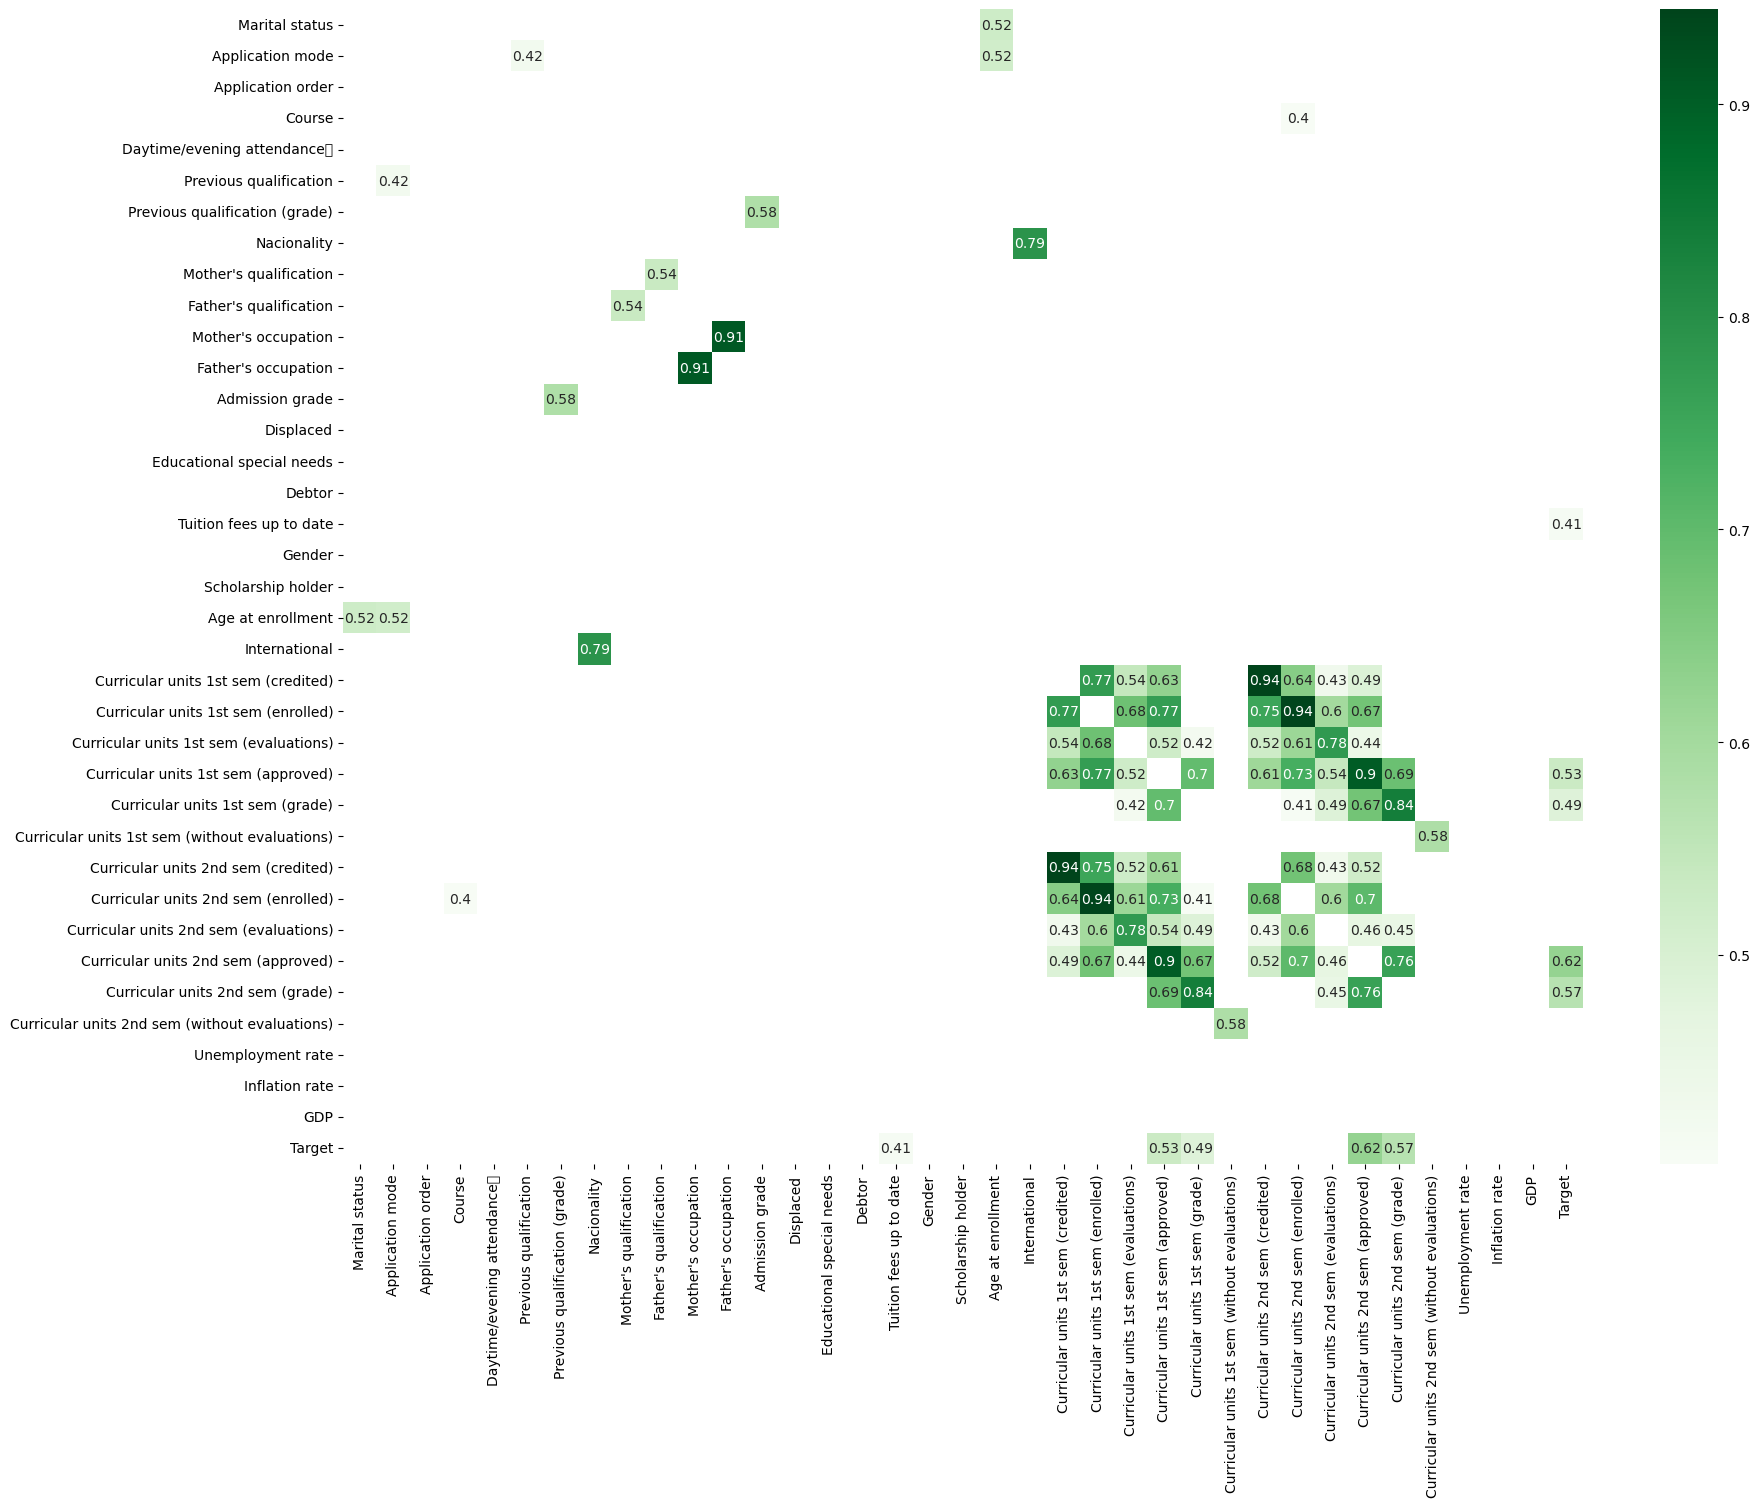

In [20]:
cmatrix = dft.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cmatrix[((cmatrix >= .4) | (cmatrix <= -.6)) & (cmatrix !=1.000)], annot=True, cmap="Greens")
plt.show()

In [21]:
pd.DataFrame(dft.corr()[dft.columns[-1:]]).sort_values(by=['Target'], ascending=False)

,Target
Target,1.000000
Curricular units 2nd sem (approved),0.624157
Curricular units 2nd sem (grade),0.566827
Curricular units 1st sem (approved),0.529123
Curricular units 1st sem (grade),0.485207
Tuition fees up to date,0.409827
Scholarship holder,0.297595
Curricular units 2nd sem (enrolled),0.175847
Curricular units 1st sem (enrolled),0.155974
Admission grade,0.120889


In [22]:
# Creating X, dataset without labels
X = dft.drop(['Target'], axis=1)

In [23]:
X.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [24]:
X.shape

(4424, 36)

In [25]:
# Creating y, the label dataset
y = dft['Target']

In [26]:
y.head()

0    0
1    2
2    0
3    2
4    2
Name: Target, dtype: int64

In [27]:
y.shape

(4424,)

In [28]:
y.unique()

array([0, 2, 1])

In [29]:
target_types = Counter(y)
print(target_types)

Counter({2: 2209, 0: 1421, 1: 794})


In [30]:
# Splitting the data into a training and a test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

Counter({2: 1767, 0: 1137, 1: 635})


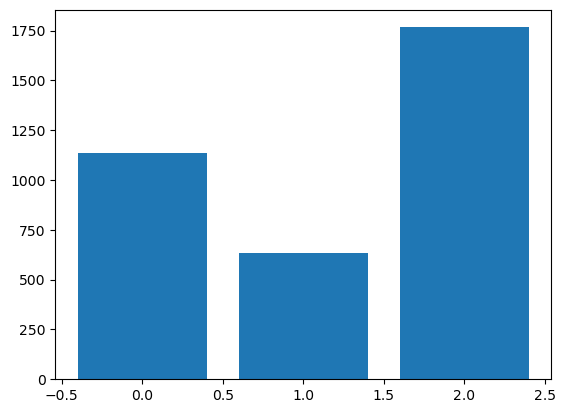

In [31]:
# Checking the distribution in the training dataset
y_lab = Counter(y_train)
print(y_lab)
plt.bar(y_lab.keys(), y_lab.values())
plt.show()

Counter({2: 442, 0: 284, 1: 159})


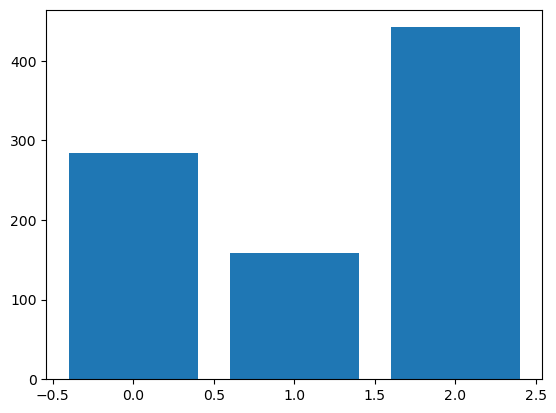

In [32]:
# Checking the distribution in the test dataset
y_lab_test = Counter(y_test)
print(y_lab_test)
plt.bar(y_lab_test.keys(), y_lab_test.values())
plt.show()

In [33]:
# Scaling the data with StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))

In [34]:
print('X_train(max):', np.max(X_train))
print('X_train(min):', np.min(X_train))
print('X_train_scaled(max):', round(np.max(X_train_scaled), 3))
print('X_train_scaled(min):', round(np.min(X_train_scaled), 3))
print('X_train(mean):', round(np.mean(X_train), 3))
print('X_train_scaled(mean):', round(np.mean(X_train_scaled), 3))
print('X_train(std):', round(np.std(X_train), 3))
print('X_train_scaled(std):', round(np.std(X_train_scaled), 3))

X_train(max): Marital status                                       6.000000
Application mode                                    53.000000
Application order                                    9.000000
Course                                            9991.000000
Daytime/evening attendance\t                         1.000000
Previous qualification                              43.000000
Previous qualification (grade)                     190.000000
Nacionality                                        109.000000
Mother's qualification                              44.000000
Father's qualification                              44.000000
Mother's occupation                                194.000000
Father's occupation                                195.000000
Admission grade                                    190.000000
Displaced                                            1.000000
Educational special needs                            1.000000
Debtor                                               1.0

/Users/nima/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/nima/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/nima/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


### 3. MODEL DEVELOPMENT

- Choosing Models
- Training Models
- Evaluating Models
- Parameter Tuning


In [102]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import BernoulliNB

lr = LogisticRegression()
gnb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()
nn = MLPClassifier(max_iter=1000)
sgd = SGDClassifier()
gbc = GradientBoostingClassifier()
abc = AdaBoostClassifier()
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
la = Lasso()
en = ElasticNet()
gpc = GaussianProcessClassifier()
pt = Perceptron()
bnb = BernoulliNB()

In [93]:
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_train_scaled)
y_pred_test = lr.predict(X_test_scaled)
tacc1 = round(accuracy_score(y_train, y_pred), 2)
acc1 = round(accuracy_score(y_test, y_pred_test), 2)
prec1 = round(precision_score(y_test, y_pred_test, average='weighted'), 2)
rec1 = round(recall_score(y_test, y_pred_test, average='weighted'), 2)
f1sco1 = round(f1_score(y_test, y_pred_test, average='weighted'), 2)

In [94]:
gnb.fit(X_train_scaled, y_train)
y_pred = gnb.predict(X_train_scaled)
y_pred_test = gnb.predict(X_test_scaled)
tacc2 = round(accuracy_score(y_train, y_pred), 2)
acc2 = round(accuracy_score(y_test, y_pred_test), 2)
prec2 = round(precision_score(y_test, y_pred_test, average='weighted'), 2)
rec2 = round(recall_score(y_test, y_pred_test, average='weighted'), 2)
f1sco2 = round(f1_score(y_test, y_pred_test, average='weighted'), 2)

In [95]:
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_train_scaled)
y_pred_test = knn.predict(X_test_scaled)
tacc3 = round(accuracy_score(y_train, y_pred), 2)
acc3 = round(accuracy_score(y_test, y_pred_test), 2)
prec3 = round(precision_score(y_test, y_pred_test, average='weighted'), 2)
rec3 = round(recall_score(y_test, y_pred_test, average='weighted'), 2)
f1sco3 = round(f1_score(y_test, y_pred_test, average='weighted'), 2)

In [96]:
dt.fit(X_train, y_train)
y_pred = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
tacc4 = round(accuracy_score(y_train, y_pred), 2)
acc4 = round(accuracy_score(y_test, y_pred_test), 2)
prec4 = round(precision_score(y_test, y_pred_test, average='weighted'), 2)
rec4 = round(recall_score(y_test, y_pred_test, average='weighted'), 2)
f1sco4 = round(f1_score(y_test, y_pred_test, average='weighted'), 2)

In [97]:
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_train_scaled)
y_pred_test = rf.predict(X_test_scaled)
tacc5 = round(accuracy_score(y_train, y_pred), 2)
acc5 = round(accuracy_score(y_test, y_pred_test), 2)
prec5 = round(precision_score(y_test, y_pred_test, average='weighted'), 2)
rec5 = round(recall_score(y_test, y_pred_test, average='weighted'), 2)
f1sco5 = round(f1_score(y_test, y_pred_test, average='weighted'), 2)

In [98]:
svc.fit(X_train_scaled, y_train)
y_pred = svc.predict(X_train_scaled)
y_pred_test = svc.predict(X_test_scaled)
tacc6 = round(accuracy_score(y_train, y_pred), 2)
acc6 = round(accuracy_score(y_test, y_pred_test), 2)
prec6 = round(precision_score(y_test, y_pred_test, average='weighted'), 2)
rec6 = round(recall_score(y_test, y_pred_test, average='weighted'), 2)
f1sco6 = round(f1_score(y_test, y_pred_test, average='weighted'), 2)

In [103]:
nn.fit(X_train_scaled, y_train)
y_pred = nn.predict(X_train_scaled)
y_pred_test = nn.predict(X_test_scaled)
tacc7 = round(accuracy_score(y_train, y_pred), 2)
acc7 = round(accuracy_score(y_test, y_pred_test), 2)
prec7 = round(precision_score(y_test, y_pred_test, average='weighted'), 2)
rec7 = round(recall_score(y_test, y_pred_test, average='weighted'), 2)
f1sco7 = round(f1_score(y_test, y_pred_test, average='weighted'), 2)

In [104]:
sgd.fit(X_train_scaled, y_train)
y_pred = sgd.predict(X_train_scaled)
y_pred_test = sgd.predict(X_test_scaled)
tacc8 = round(accuracy_score(y_train, y_pred), 2)
acc8 = round(accuracy_score(y_test, y_pred_test), 2)
prec8 = round(precision_score(y_test, y_pred_test, average='weighted'), 2)
rec8 = round(recall_score(y_test, y_pred_test, average='weighted'), 2)
f1sco8 = round(f1_score(y_test, y_pred_test, average='weighted'), 2)

In [105]:
gbc.fit(X_train_scaled, y_train)
y_pred = gbc.predict(X_train_scaled)
y_pred_test = gbc.predict(X_test_scaled)
tacc9 = round(accuracy_score(y_train, y_pred), 2)
acc9 = round(accuracy_score(y_test, y_pred_test), 2)
prec9 = round(precision_score(y_test, y_pred_test, average='weighted'), 2)
rec9 = round(recall_score(y_test, y_pred_test, average='weighted'), 2)
f1sco9 = round(f1_score(y_test, y_pred_test, average='weighted'), 2)

In [106]:
abc.fit(X_train_scaled, y_train)
y_pred = abc.predict(X_train_scaled)
y_pred_test = abc.predict(X_test_scaled)
tacc10 = round(accuracy_score(y_train, y_pred), 2)
acc10 = round(accuracy_score(y_test, y_pred_test), 2)
prec10 = round(precision_score(y_test, y_pred_test, average='weighted'), 2)
rec10 = round(recall_score(y_test, y_pred_test, average='weighted'), 2)
f1sco10 = round(f1_score(y_test, y_pred_test, average='weighted'), 2)

In [107]:
lda.fit(X_train_scaled, y_train)
y_pred = lda.predict(X_train_scaled)
y_pred_test = lda.predict(X_test_scaled)
tacc11 = round(accuracy_score(y_train, y_pred), 2)
acc11 = round(accuracy_score(y_test, y_pred_test), 2)
prec11 = round(precision_score(y_test, y_pred_test, average='weighted'), 2)
rec11 = round(recall_score(y_test, y_pred_test, average='weighted'), 2)
f1sco11 = round(f1_score(y_test, y_pred_test, average='weighted'), 2)

In [108]:
qda.fit(X_train_scaled, y_train)
y_pred = qda.predict(X_train_scaled)
y_pred_test = qda.predict(X_test_scaled)
tacc12 = round(accuracy_score(y_train, y_pred), 2)
acc12 = round(accuracy_score(y_test, y_pred_test), 2)
prec12 = round(precision_score(y_test, y_pred_test, average='weighted'), 2)
rec12 = round(recall_score(y_test, y_pred_test, average='weighted'), 2)
f1sco12 = round(f1_score(y_test, y_pred_test, average='weighted'), 2)

In [109]:
gpc.fit(X_train_scaled, y_train)
y_pred = gpc.predict(X_train_scaled)
y_pred_test = gpc.predict(X_test_scaled)
tacc13 = round(accuracy_score(y_train, y_pred), 2)
acc13 = round(accuracy_score(y_test, y_pred_test), 2)
prec13 = round(precision_score(y_test, y_pred_test, average='weighted'), 2)
rec13 = round(recall_score(y_test, y_pred_test, average='weighted'), 2)
f1sco13 = round(f1_score(y_test, y_pred_test, average='weighted'), 2)

In [110]:
pt.fit(X_train_scaled, y_train)
y_pred = pt.predict(X_train_scaled)
y_pred_test = pt.predict(X_test_scaled)
tacc14 = round(accuracy_score(y_train, y_pred), 2)
acc14 = round(accuracy_score(y_test, y_pred_test), 2)
prec14 = round(precision_score(y_test, y_pred_test, average='weighted'), 2)
rec14 = round(recall_score(y_test, y_pred_test, average='weighted'), 2)
f1sco14 = round(f1_score(y_test, y_pred_test, average='weighted'), 2)

<a id="change-bnb-fit"></a>

In [4]:
# Was using the variable names as pt.fit section, (<name>14), changed it to <name>15 so it works with the summary

bnb.fit(X_train_scaled, y_train)
y_pred = bnb.predict(X_train_scaled)
y_pred_test = bnb.predict(X_test_scaled)
tacc15 = round(accuracy_score(y_train, y_pred), 2)
acc15 = round(accuracy_score(y_test, y_pred_test), 2)
prec15 = round(precision_score(y_test, y_pred_test, average='weighted'), 2)
rec15 = round(recall_score(y_test, y_pred_test, average='weighted'), 2)
f1sco15 = round(f1_score(y_test, y_pred_test, average='weighted'), 2)

In [112]:
summary = pd.DataFrame({'Train Accuracy':[tacc1, tacc2, tacc3, tacc4, tacc5, tacc6, tacc7, tacc8, tacc9, tacc10, tacc11, tacc12, tacc13, tacc14, tacc15],\
                        'Test Accuracy':[acc1, acc2, acc3, acc4, acc5, acc6, acc7, acc8, acc9, acc10, acc11, acc12, acc13, acc14, acc15],\
                   'Test Precision':[prec1, prec2, prec3, prec4, prec5, prec6, prec7, prec8, prec9, prec10, prec11, prec12, prec13, prec14, prec15],\
                   'Test Recall':[rec1, rec2, rec3, rec4, rec5, rec6, rec7, rec8, rec9, rec10, rec11, rec12, rec13, rec14, rec15],\
                   'Test F1-score':[f1sco1, f1sco2, f1sco3, f1sco6, f1sco5, f1sco6, f1sco7, f1sco8, f1sco9, f1sco10, f1sco11, f1sco12, f1sco13, f1sco14, f1sco15]},\
                   index=['Logistic Regression', 'Gaussian Naive Bayes', 'KNN', 'Decision Tree', 'Random Forest', 'SVC', 'MLP', 'SGD', 'Gradient Boosting', 'AdaBoost', 'LinearDiscriminantAnalysis', 'QuadraticDiscriminantAnalysis', 'Gaussian Process', 'Perceptron', 'Bernoulli Naive Bayes'])
display(summary)

,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1-score
Logistic Regression,0.7700,0.76,0.75,0.76,0.75
Gaussian Naive Bayes,0.6900,0.68,0.66,0.68,0.67
KNN,0.7900,0.67,0.66,0.67,0.66
Decision Tree,1.0000,0.67,0.67,0.67,0.76
Random Forest,1.0000,0.78,0.76,0.78,0.76
SVC,0.8200,0.77,0.76,0.77,0.76
MLP,1.0000,0.68,0.69,0.68,0.69
SGD,0.7500,0.73,0.71,0.73,0.71
Gradient Boosting,0.8400,0.77,0.76,0.77,0.76
AdaBoost,0.7600,0.76,0.74,0.76,0.75


The summary shows that the models Logistic Regression, Random Forest, Gradient Boosting and SVC have the most potential for further investigation. These will be chosen for the Hyperparameter Tuning and for Ensemble method.

In [133]:
from sklearn.ensemble import VotingClassifier

lr = LogisticRegression()
#create our voting classifier
ensemble = VotingClassifier(estimators=[('lr', lr), ('rf', rf), ('gbc', gbc), ('svc', svc)], voting='hard', n_jobs=-1)

In [137]:
#fit model to training data
ensemble.fit(X_train_scaled, y_train)

#test our model on the test data
print(ensemble.score(X_train_scaled, y_train))
print(ensemble.score(X_test_scaled, y_test))

0.8578694546482057
0.7796610169491526


In [400]:
# Hyperparameters
params_lr = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
             'solver':['lbfgs', 'saga', 'sag', 'liblinear'],
             'max_iter':[300]}

params_svc = {'kernel':['linear', 'poly', 'rbf'],
              'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'gamma':['scale', 'auto', 0.1, 1, 10, 100],
              'coef0':[0, 1]}

params_rf = {'bootstrap': [True, False],
             'max_depth': [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             'max_features': ['auto', 'sqrt', 'log2', None],
             'min_samples_leaf': [1, 2, 4, 10, 30, 60],
             'min_samples_split': [2, 5, 10],
             'n_estimators': [10, 50, 100, 200, 500, 1000, 1500, 2000]}

# max_iter = epochs

# RandomizedSearchCV
racv_lr = RandomizedSearchCV(lr, params_lr, n_jobs=-1, cv=5)
racv_svc = RandomizedSearchCV(svc, params_svc, n_jobs=-1, cv=5)
racv_rf = RandomizedSearchCV(rf, params_rf, n_jobs=-1, cv=5)
racv_nn = RandomizedSearchCV(nn, params_nn, n_jobs=-1, cv=5)

In [374]:
%%time
# RandomizedSearchCV lr
racv_lr.fit(X_train_scaled, y_train)

CPU times: user 345 ms, sys: 17.4 ms, total: 363 ms
Wall time: 774 ms


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'max_iter': [300],
                                        'solver': ['lbfgs', 'saga', 'sag',
                                                   'liblinear']})

In [375]:
# Print best hyperparameter settings after tuning
print(racv_lr.best_params_)
# Print best score
print('Accuracy with optimized hyperparameters:', racv_lr.best_score_)
print('Accuracy with default hyperparameters:', lr_acc)

{'solver': 'lbfgs', 'max_iter': 300, 'C': 10}
LogisticRegression(C=10, max_iter=300)
Accuracy with optimized hyperparameters: 0.7694247996228194
Accuracy with default hyperparameters: 0.7799


In [376]:
%%time
# RandomizedSearchCV svc
racv_svc.fit(X_train_scaled, y_train)

CPU times: user 24.8 s, sys: 53.9 ms, total: 24.9 s
Wall time: 56.6 s


RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'coef0': [0, 1],
                                        'gamma': ['scale', 'auto', 0.1, 1, 10,
                                                  100],
                                        'kernel': ['linear', 'poly', 'rbf']})

In [377]:
# Print best hyperparameter settings after tuning
print(racv_svc.best_params_)
# Print best score
print('Accuracy with optimized hyperparameters:', racv_svc.best_score_)
print('Accuracy with default hyperparameters:', svc_acc)

{'kernel': 'linear', 'gamma': 'auto', 'coef0': 1, 'C': 100}
SVC(C=100, coef0=1, gamma='auto', kernel='linear')
Accuracy with optimized hyperparameters: 0.7691451106369718
Accuracy with default hyperparameters: 0.8203


In [378]:
%%time
# RandomizedSearchCV rf
racv_rf.fit(X_train_scaled, y_train)

CPU times: user 3.01 s, sys: 113 ms, total: 3.12 s
Wall time: 40.2 s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 5, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 10, 30,
                                                             60],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200, 500,
                                                         1000, 1500, 2000]})

In [379]:
# Print best hyperparameter settings after tuning
print(racv_rf.best_params_)
# Print best score
print('Accuracy with optimized hyperparameters:', racv_rf.best_score_)
print('Accuracy with default hyperparameters:', rf_acc)

{'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': False}
Accuracy with optimized hyperparameters: 0.7835510911866005
Accuracy with default hyperparameters: 1.0


In [ ]:
# balansera datasettet

In [ ]:
# remove enrolled, balansera datasettet

In [318]:
lr.fit(X_train_scaled, y_train)
importance_lr = pd.DataFrame(data={
    'attr': X_train.columns,
    'im_lr': lr.coef_[0]
})
importance_lr = importance_lr.sort_values(by='im_lr', ascending=False)

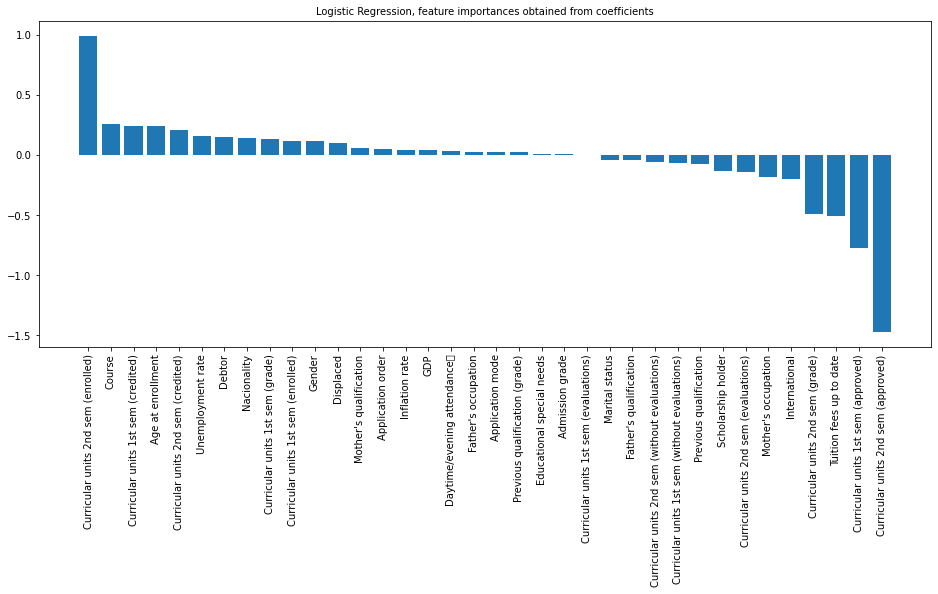

In [319]:
plt.figure(figsize=(16,6))
plt.bar(x=importance_lr['attr'], height=importance_lr['im_lr'])
plt.title('Logistic Regression, feature importances obtained from coefficients', size=10)
plt.xticks(rotation='vertical')
plt.show()

In [320]:
rf.fit(X_train_scaled, y_train)
importance_rf = pd.DataFrame(data={
    'attr': X_train.columns,
    'im_rf': rf.feature_importances_
})
importance_rf = importance_rf.sort_values(by='im_rf', ascending=False)

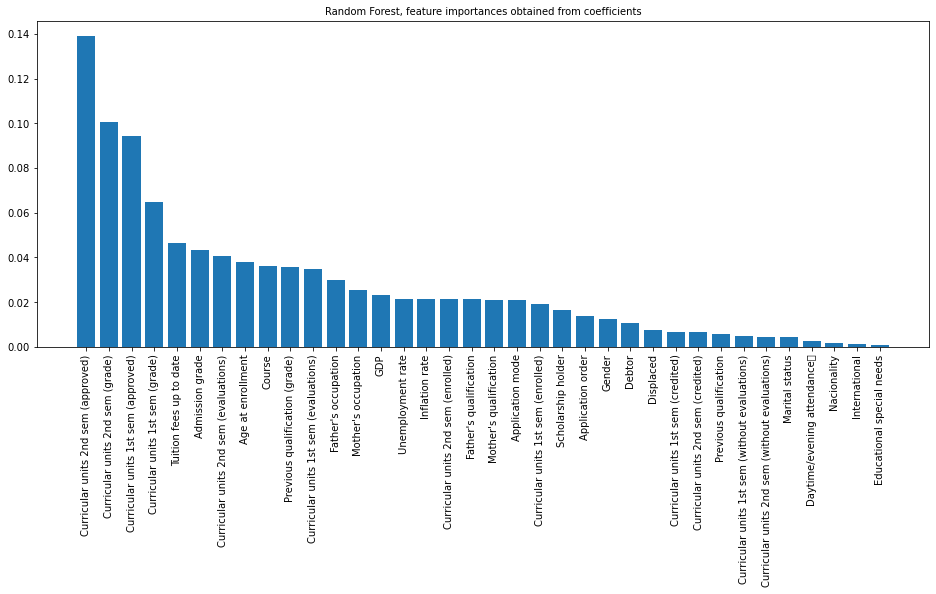

In [327]:
plt.figure(figsize=(16,6))
plt.bar(x=importance_rf['attr'], height=importance_rf['im_rf'])
plt.title('Random Forest, feature importances obtained from coefficients', size=10)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = ['input1', 'input2']
svm = svm.SVC(kernel='linear')
svm.fit(X, Y)
f_importances(svm.coef_, features_names)

### 4. MODEL EVALUATION

### 5. PROJECT CONCLUSIONS